In [21]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

In [22]:
file_path = 'evaluate_noisy_free_opt.csv'
df = pd.read_csv(file_path)
df = df[(df['pkid'] % 4 == 2)]
df = df[(df['ARG']<100) & (df['ARG']>0)]
df = df[df['in_constraints_probs'] > 99.5]
noisefree_df = df.groupby(['method'], as_index=False).mean()

noisefree_df

,method,pkid,pbid,layers,variables,constraints,best_solution_probs,in_constraints_probs,ARG,iteration_count,classcial,quantum,run_times
0,ChocoSolver,9.331887,49.368764,5.0,17.956616,8.386117,21.114934,99.998729,0.808753,107.188720,16.364147,22.576754,118.451193
1,QtoSimplifyDiscardSegmentedSolver,8.659740,50.989610,5.0,18.098701,8.475325,30.826296,100.000000,0.617354,238.574026,617.111631,2412.024588,183000.451948
2,QtoSimplifyDiscardSolver,9.339207,49.808370,5.0,17.982379,8.392070,41.072627,99.997634,0.526450,244.268722,42.156760,65.404798,426.755507
3,QtoSimplifySolver,9.273523,49.389497,5.0,17.969365,8.400438,40.689107,99.999786,0.525903,301.000000,63.790536,101.400955,459.923414
4,QtoSolver,9.320261,49.520697,5.0,17.965142,8.389978,37.870838,99.998723,0.555113,301.000000,63.400190,114.875673,459.361656


In [23]:
noisefree_df['ARG']

0    0.808753
1    0.617354
2    0.526450
3    0.525903
4    0.555113
Name: ARG, dtype: float64

In [24]:
file_path = 'ibm_kyiv.csv'
df = pd.read_csv(file_path)

# # df = df.drop(columns=['pbid'])
# df = df[df['depth'] >= 20]
# df = df[(df['num_params'] >= 1)]
noise_df = df.groupby(['pkid','method'], as_index=False).mean()

# values = ["depth", "culled_depth"]
values = ["depth", 'num_params']
noise_df

,pkid,method,pksid,pbid,layers,variables,constraints,best_solution_probs,in_constraints_probs,ARG,iteration_count,classcial,quantum,run_times
0,0,ChocoSolver,1.125,1.5,1.0,7.125,4.5,3.161621,7.025146,92.236691,15.59375,2.300877,290.963441,9008.0
1,0,HeaSolver,1.125,1.5,5.0,7.125,4.5,1.245117,3.564453,99.564595,31.00000,4.755527,471.853732,17408.0
2,0,PenaltySolver,1.125,1.5,5.0,7.125,4.5,1.068115,3.765869,98.066347,31.00000,4.884125,478.465745,17408.0
3,0,QtoSimplifyDiscardSegmentedSolver,1.125,1.5,5.0,7.125,4.5,42.232526,100.000000,0.229510,29.87500,19.333488,17946.774709,216896.0
4,0,QtoSimplifyDiscardSolver,1.125,1.5,5.0,7.125,4.5,2.807617,7.507324,69.654638,23.65625,3.768602,580.854117,13424.0
5,0,QtoSimplifySolver,1.125,1.5,5.0,7.125,4.5,1.605225,3.765869,96.028854,31.00000,4.855909,1591.476714,17408.0
6,0,QtoSolver,1.125,1.5,5.0,7.125,4.5,1.281738,3.723145,96.986215,31.00000,4.738286,1083.423173,17408.0


/tmp/ipykernel_3122878/791326468.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left',ncol=2,frameon=False,prop={'size':10*scale},bbox_to_anchor=(0,1,0,0),mode="expand",borderaxespad=0)


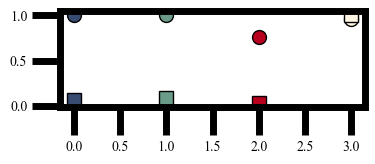

In [25]:
## width 252pt
import numpy as np
import matplotlib.pyplot as plt
## set the figure size and font size
# width of figure in inc
scale = 1
width = 252/64*scale    
# height of figure in inc
height = 80/64*scale
plt.rcParams['figure.figsize'] = (width, height)
plt.rcParams['font.size'] = 10*scale
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
## set hatch density
plt.rcParams['hatch.linewidth'] = 0.2
plt.rcParams['hatch.color'] = 'black'
plt.rcParams['lines.linewidth'] = 0.7*scale
## read the data
## read the data
# 画图部分
error_params = dict(elinewidth=0.7*scale,ecolor='black',capsize=1.9*scale,capthick=0.5*scale)
bar_width = 0.5
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4','#FFF','#FFF']
# axes1 = plt.axes([0,0,0.4,1])
# 背景设置为白色color=['white'],然后更改填充hatch="xxxx"，就可以画出不同图形
latency = []
methods = []
iteration_counts = []
runtimes = []
for idx,method in enumerate(['QtoSolver','QtoSimplifySolver','QtoSimplifyDiscardSolver','QtoSimplifyDiscardSegmentedSolver']):
        data = noise_df[noise_df.method == method]
        methods.append(method)
        latency.append(data['quantum']+data['classcial'])
        iteration_counts.append(data['iteration_count'])
        runtimes.append(data['run_times'])
## normalize the data
latency = np.array(latency)/np.max(latency)
iteration_counts = np.array(iteration_counts)/np.max(iteration_counts)
runtimes = np.array(runtimes)/np.max(runtimes)
x = np.arange(len(methods))
for i in x:
        
        plt.plot(i,iteration_counts[i],color=colors[i],marker='o',markersize=10*scale,linestyle='--',linewidth=0.7*scale,markeredgecolor='black',markeredgewidth=1*scale)
        plt.plot(i,latency[i],color=colors[i],marker='s',markersize=10*scale,linestyle='--',linewidth=0.7*scale,markeredgecolor='black',markeredgewidth=1*scale)
## DRAW A LINE WITH 100%
# plt.plot([-0.4,0.6],[100,100],color='red',linestyle='--',linewidth=0.7*scale)
plt.legend(loc='upper left',ncol=2,frameon=False,prop={'size':10*scale},bbox_to_anchor=(0,1,0,0),mode="expand",borderaxespad=0)
plt.savefig('latency.svg',dpi=1200*6.33,bbox_inches='tight')


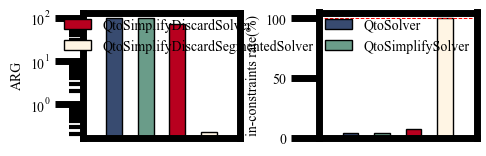

In [26]:
import numpy as np
import matplotlib.pyplot as plt
## set the figure size and font size
# width of figure in inc
scale = 1
width = 252/64*scale    
# height of figure in inc
height = 80/64*scale
plt.rcParams['figure.figsize'] = (width, height)
plt.rcParams['font.size'] = 10*scale
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
## set hatch density
plt.rcParams['hatch.linewidth'] = 0.2
plt.rcParams['hatch.color'] = 'black'
plt.rcParams['lines.linewidth'] = 0.7*scale
## read the data
## read the data
# 画图部分
error_params = dict(elinewidth=0.7*scale,ecolor='black',capsize=1.9*scale,capthick=0.5*scale)
bar_width = 0.2
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4','#FFF','#FFF']
axes1 = plt.axes([0,0,0.4,1])
# 背景设置为白色color=['white'],然后更改填充hatch="xxxx"，就可以画出不同图形
for idx,method in enumerate(['QtoSolver','QtoSimplifySolver','QtoSimplifyDiscardSolver','QtoSimplifyDiscardSegmentedSolver']):
        data = noise_df[noise_df.method == method]
        x = np.arange(len(data.pkid))
        y = data['ARG']
        plt.xticks([])
        plt.bar(x+idx*bar_width-bar_width,y,0.1,color=colors[idx],
                error_kw=error_params,edgecolor="black",label=method)
        plt.ylabel('ARG')
        plt.yscale('log')
        plt.xlim(-0.4,0.6)
axes2 = plt.axes([0.6,0,0.4,1])
for idx,method in enumerate(['QtoSolver','QtoSimplifySolver','QtoSimplifyDiscardSolver','QtoSimplifyDiscardSegmentedSolver']):
        data = noise_df[noise_df.method == method]
        x = np.arange(len(data.pkid))
        y = data['in_constraints_probs']
        plt.bar(x+idx*bar_width-bar_width,y,0.1,color=colors[idx],
                error_kw=error_params,edgecolor="black",label=method)
        plt.xticks([])
        plt.ylim(0,105)
        plt.xlim(-0.4,0.6)
        
        plt.ylabel('in-constraints rate(%)')
## DRAW A LINE WITH 100%
plt.plot([-0.4,0.6],[100,100],color='red',linestyle='--',linewidth=0.7*scale)
plt.legend(loc='upper left',ncol=2,frameon=False,prop={'size':10*scale},bbox_to_anchor=(0,1,0,0),mode="expand",borderaxespad=0)
plt.savefig('argincons.svg',dpi=1200*6.33,bbox_inches='tight')


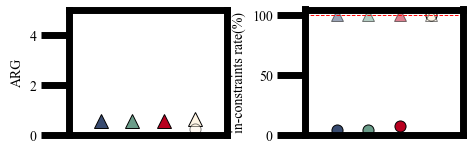

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
## set the figure size and font size
# width of figure in inc
scale = 1
width = 252/64*scale    
# height of figure in inc
height = 80/64*scale
plt.rcParams['figure.figsize'] = (width, height)
plt.rcParams['font.size'] = 10*scale
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
## set hatch density
plt.rcParams['hatch.linewidth'] = 0.2
plt.rcParams['hatch.color'] = 'black'
plt.rcParams['lines.linewidth'] = 0.7*scale
## read the data
## read the data
# 画图部分
error_params = dict(elinewidth=0.7*scale,ecolor='black',capsize=1.9*scale,capthick=0.5*scale)
bar_width = 0.2
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4','#FFF','#FFF']
axes1 = plt.axes([0,0,0.4,1])
# 背景设置为白色color=['white'],然后更改填充hatch="xxxx"，就可以画出不同图形
for idx,method in enumerate(['QtoSolver','QtoSimplifySolver','QtoSimplifyDiscardSolver','QtoSimplifyDiscardSegmentedSolver']):
        data = noise_df[noise_df.method == method]
        x = np.arange(len(data.pkid))
        y = data['ARG']
        noisefree_y = noisefree_df[noisefree_df.method == method]['ARG']
        plt.xticks([])
        plt.plot(x+idx*bar_width-bar_width,noisefree_y,color=colors[idx],marker='^',markersize=10*scale,
                 markeredgecolor='black',markeredgewidth=0.7*scale,label=method)
        plt.plot(x+idx*bar_width-bar_width,y,color=colors[idx],marker='o',markersize=8*scale,alpha = 0.5,
                 markeredgecolor='black',markeredgewidth=0.7*scale,label=method)
        # plt.bar(x+idx*bar_width-bar_width,y,0.1,color=colors[idx],
        #         error_kw=error_params,edgecolor="black",label=method)
        plt.ylabel('ARG')
        # plt.yscale('log')
        plt.ylim(-200,100)
        plt.yticks([50,100])
        plt.xlim(-0.4,0.6)
axes2 = plt.axes([0.6,0,0.4,1])
for idx,method in enumerate(['QtoSolver','QtoSimplifySolver','QtoSimplifyDiscardSolver','QtoSimplifyDiscardSegmentedSolver']):
        data = noise_df[noise_df.method == method]
        x = np.arange(len(data.pkid))
        y = data['in_constraints_probs']
        noisefree_y = noisefree_df[noisefree_df.method == method]['in_constraints_probs']
        plt.xticks([])
        plt.plot(x+idx*bar_width-bar_width,y,color=colors[idx],marker='o',markersize=8*scale,
                 markeredgecolor='black',markeredgewidth=0.7*scale,label=method)
        plt.plot(x+idx*bar_width-bar_width,noisefree_y,color=colors[idx],marker='^',markersize=8*scale,alpha = 0.5,
                 markeredgecolor='black',markeredgewidth=0.7*scale,label=method)
        # plt.bar(x+idx*bar_width-bar_width,y,0.1,color=colors[idx],
        #         error_kw=error_params,edgecolor="black",label=method)
        plt.xticks([])
        plt.ylim(0,105)
        plt.xlim(-0.4,0.6)
        
        plt.ylabel('in-constraints rate(%)')
## DRAW A LINE WITH 100%
plt.plot([-0.4,0.6],[100,100],color='red',linestyle='--',linewidth=0.7*scale)
# plt.legend(loc='upper left',ncol=2,frameon=False,prop={'size':10*scale},bbox_to_anchor=(0,1,0,0),mode="expand",borderaxespad=0)
plt.savefig('argincons2.svg',dpi=1200*6.33,bbox_inches='tight')


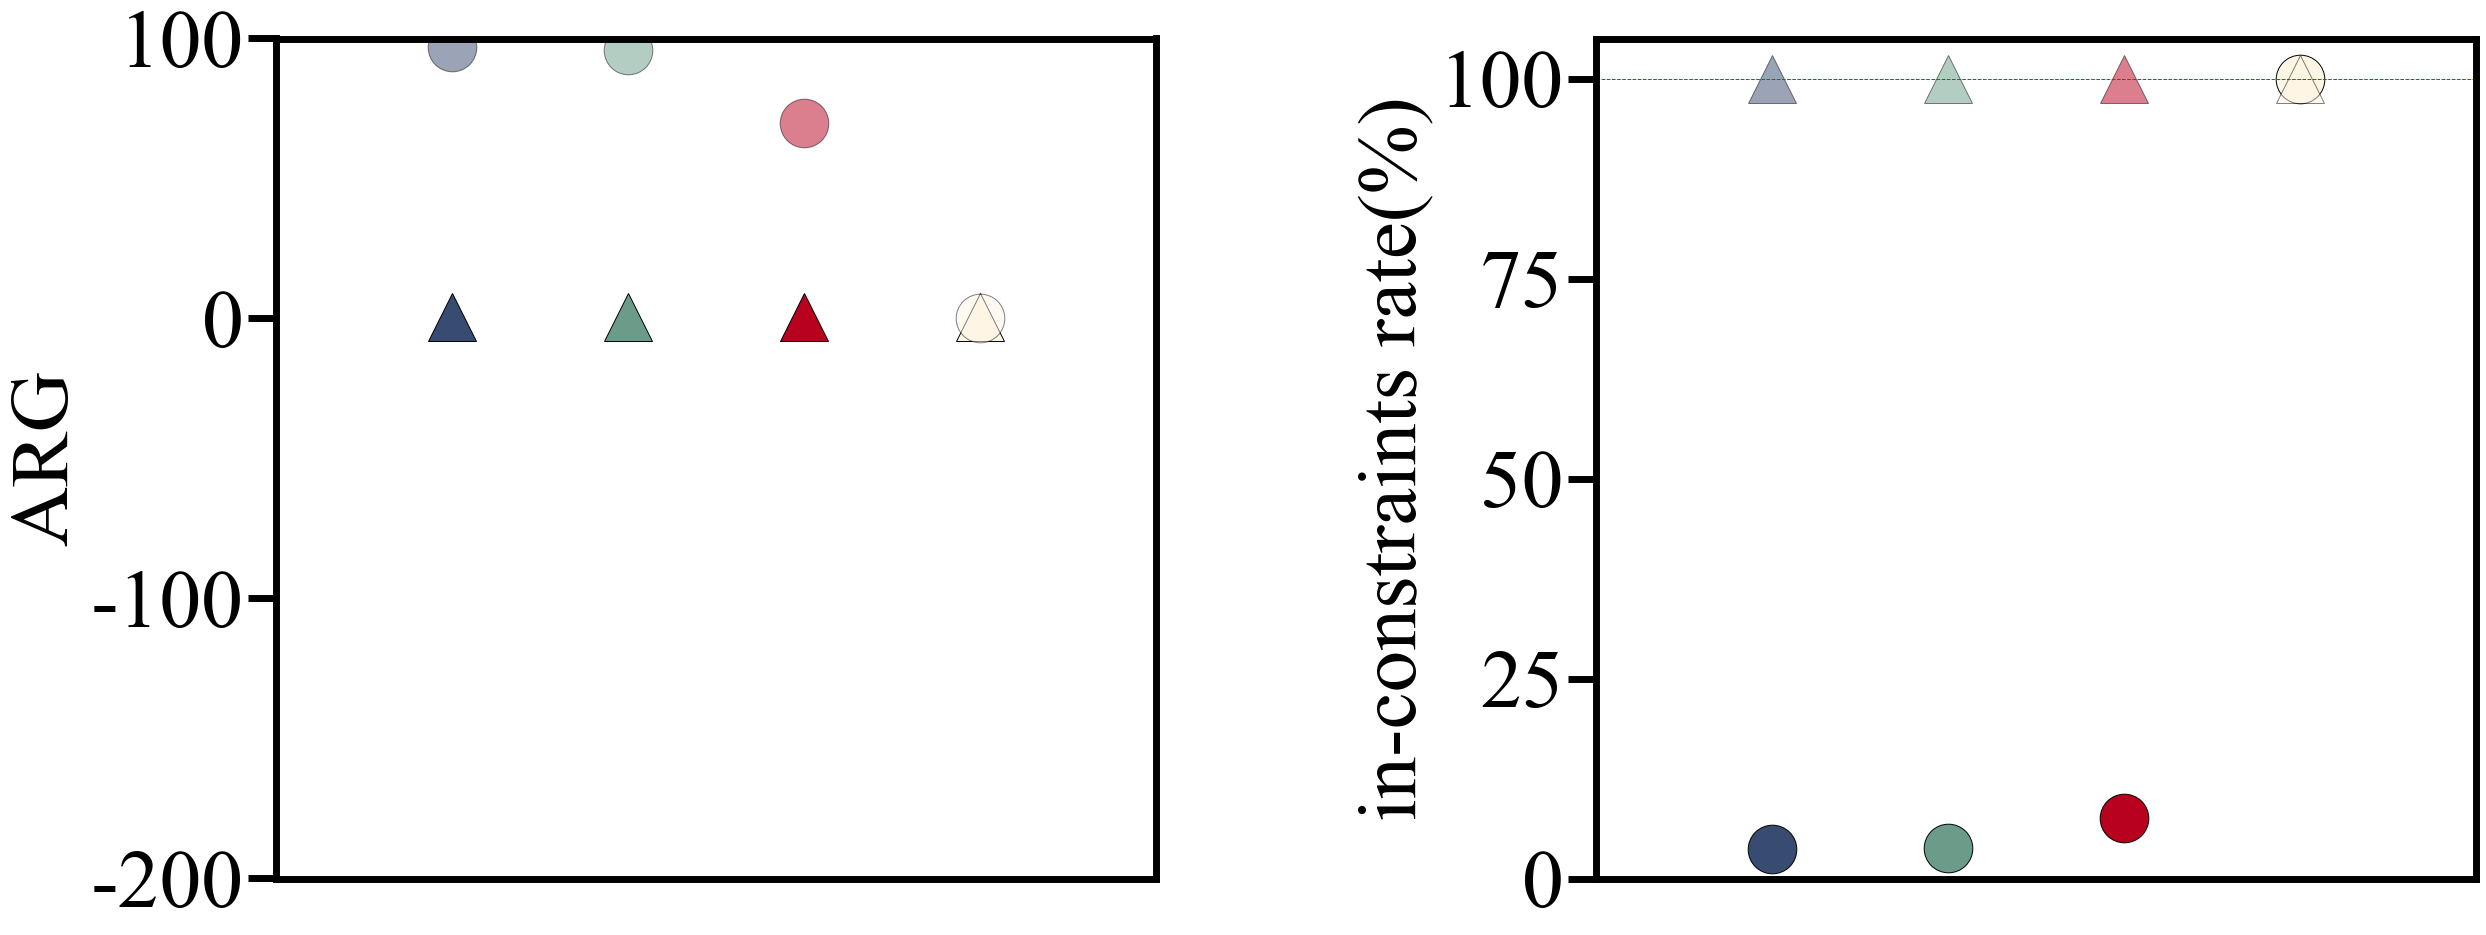

In [31]:
import numpy as np
import matplotlib.pyplot as plt
## set the figure size and font size
# width of figure in inc
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" :  'full',
    # 'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})
error_params = dict(elinewidth=0.7*scale,ecolor='black',capsize=1.9*scale,capthick=0.5*scale)
bar_width = 0.2
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4','#FFF','#FFF']
axes1 = plt.axes([0,0,0.4,0.7])
# 背景设置为白色color=['white'],然后更改填充hatch="xxxx"，就可以画出不同图形
for idx,method in enumerate(['QtoSolver','QtoSimplifySolver','QtoSimplifyDiscardSolver','QtoSimplifyDiscardSegmentedSolver']):
        data = noise_df[noise_df.method == method]
        x = np.arange(len(data.pkid))
        y = data['ARG']
        noisefree_y = noisefree_df[noisefree_df.method == method]['ARG']
        plt.xticks([])
        plt.plot(x+idx*bar_width-bar_width,noisefree_y,color=colors[idx],marker='^',
                 markeredgecolor='black',markeredgewidth=0.7*scale,label=method)
        plt.plot(x+idx*bar_width-bar_width,y,color=colors[idx],marker='o',alpha = 0.5,
                 markeredgecolor='black',markeredgewidth=0.7*scale,label=method)
        # plt.bar(x+idx*bar_width-bar_width,y,0.1,color=colors[idx],
        #         error_kw=error_params,edgecolor="black",label=method)
        plt.ylabel('ARG')
        # plt.yscale('log')
        plt.ylim(-200,100)
        # plt.yticks([50,100])
        plt.xlim(-0.4,0.6)
axes2 = plt.axes([0.6,0,0.4,0.7])
for idx,method in enumerate(['QtoSolver','QtoSimplifySolver','QtoSimplifyDiscardSolver','QtoSimplifyDiscardSegmentedSolver']):
        data = noise_df[noise_df.method == method]
        x = np.arange(len(data.pkid))
        y = data['in_constraints_probs']
        noisefree_y = noisefree_df[noisefree_df.method == method]['in_constraints_probs']
        plt.xticks([])
        plt.plot(x+idx*bar_width-bar_width,y,color=colors[idx],marker='o',
                 markeredgecolor='black',markeredgewidth=0.7*scale,label=method)
        plt.plot(x+idx*bar_width-bar_width,noisefree_y,color=colors[idx],marker='^',alpha = 0.5,
                 markeredgecolor='black',markeredgewidth=0.7*scale,label=method)
        # plt.bar(x+idx*bar_width-bar_width,y,0.1,color=colors[idx],
        #         error_kw=error_params,edgecolor="black",label=method)
        plt.xticks([])
        plt.ylim(0,105)
        plt.xlim(-0.4,0.6)
        
        plt.ylabel('in-constraints rate(%)')
## DRAW A LINE WITH 100%
plt.plot([-0.4,0.6],[100,100],color='red',linestyle='--',linewidth=0.7*scale)
# plt.legend(loc='upper left',ncol=2,frameon=False,prop={'size':10*scale},bbox_to_anchor=(0,1,0,0),mode="expand",borderaxespad=0)
plt.savefig('argincons2.svg',dpi=1200*6.33,bbox_inches='tight')


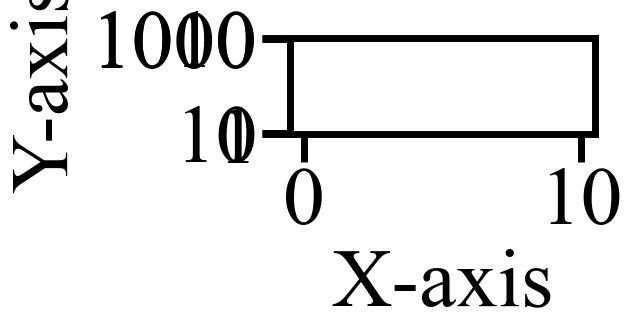

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FixedLocator, FixedFormatter

# 数据示例
x = np.linspace(0, 10, 100)
y1 = np.linspace(1, 10, 100)  # 第一段
y2 = np.linspace(1000, 1010, 100)  # 第二段

# 合并数据
y = np.concatenate([y1, y2])
z = np.sin(x)  # 示例函数值

# 绘图
fig, ax = plt.subplots()
ax.plot(x, z)

# 自定义刻度
ticks = [1, 10, 1000, 1010]  # 定义刻度位置
tick_labels = ['1', '10', '1000', '1010']  # 定义刻度标签
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels)

# 可选：显示水平网格线
ax.yaxis.set_major_locator(FixedLocator(ticks))
ax.yaxis.set_major_formatter(FixedFormatter(tick_labels))

# 添加图例和标签
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.6)

plt.show()


In [30]:
culled_depth_qtosimplify_discard = pivot_df['depth']['QTOSimplifyDiscardSolver']
num_params_qtosimplify_discard = pivot_df['num_params']['QTOSimplifyDiscardSolver']

# 计算新的列并将其添加到 `pivot_df`
pivot_df[('culled_depth_per_param', 'QTOSimplifyDiscardSolver')] = culled_depth_qtosimplify_discard / num_params_qtosimplify_discard
pivot_df

NameError: name 'pivot_df' is not defined

In [ ]:
mean_values_per_column = pivot_df.mean()
print(mean_values_per_column)

depth                   HeaSolver                     93.250000
                        PenaltySolver                286.902000
                        ChocoSolver                 2575.283000
                        QTOSimplifyDiscardSolver    1340.445369
num_params              HeaSolver                    231.750000
                        PenaltySolver                 10.000000
                        ChocoSolver                   10.000000
                        QTOSimplifyDiscardSolver      26.562744
culled_depth_per_param  QTOSimplifyDiscardSolver      56.202095
dtype: float64


In [ ]:
# 定义格式化函数
import numpy as np
# def format_value(val):
#     if np.isnan(val):  # 如果是NaN值则返回空字符
#         return "NaN"
#     elif val < 100:  # 如果值小于100，保留3位有效数字
#         return f"{val:.2f}"
#     else:  # 如果值大于等于100，不保留小数点
#         return f"{val:.0f}"

# 按行遍历输出，每个值用 & 分隔
for row in pivot_df.itertuples(index=False):
    formatted_row = [f"{x:5.0f}" for x in row]
    print(" & ".join(formatted_row))

   46 &    87 &   507 &   102 &    90 &    10 &    10 &     3 &    34
   91 &   148 &  1888 &  1296 &   225 &    10 &    10 &    26 &    49
  121 &   174 &  2688 &  3092 &   315 &    10 &    10 &    53 &    58
  156 &   207 &  3848 &  3754 &   420 &    10 &    10 &    65 &    58
   76 &   259 &  1879 &   454 &   180 &    10 &    10 &     8 &    54
   91 &   310 &  1697 &   365 &   225 &    10 &    10 &     6 &    64
  116 &   745 &  3207 &  1016 &   300 &    10 &    10 &    26 &    40
  136 &   791 &  3515 &   986 &   360 &    10 &    10 &    18 &    56
   56 &   175 &  1324 &   344 &   120 &    10 &    10 &     4 &    85
   91 &   250 &  3533 &   698 &   225 &    10 &    10 &     8 &    87
  106 &   285 &  4396 &  2897 &   270 &    10 &    10 &    33 &    87
  121 &   324 &  5275 &  3337 &   315 &    10 &    10 &    38 &    87
   51 &   110 &  1082 &   226 &   105 &    10 &    10 &     4 &    56
   66 &   136 &  2039 &   456 &   150 &    10 &    10 &     7 &    69
   86 &   170 &  313

In [ ]:
# 选取 'depth' 下的所有列，并剔除 'NewSolver' 和 'QTOSimplifySolver'
depth_df = pivot_df['depth'].drop(columns=['NewSolver', 'QTOSimplifySolver'], errors='ignore')

# 选取 'culled_depth_per_param' 下的 'QTOSimplifyDiscardSolver' 列
qtosimplify_discard_df = pivot_df['culled_depth_per_param'][['QTOSimplifyDiscardSolver']]

# 合并处理后的 'depth' 列与 'QTOSimplifyDiscardSolver' 列，并指定后缀避免冲突
culled_depth_df = depth_df.join(qtosimplify_discard_df, lsuffix='_depth', rsuffix='_culled')

# 按行遍历输出值，每个值用 & 分隔
for row in culled_depth_df.itertuples(index=False):
    formatted_row = [f"{x:5.0f}" for x in row]
    print(" & ".join(formatted_row))


   46 &    87 &   507 &   102 &    34
   91 &   148 &  1888 &  1296 &    49
  121 &   174 &  2688 &  3092 &    58
  156 &   207 &  3848 &  3754 &    58
   76 &   259 &  1879 &   454 &    54
   91 &   310 &  1697 &   365 &    64
  116 &   745 &  3207 &  1016 &    40
  136 &   791 &  3515 &   986 &    56
   56 &   175 &  1324 &   344 &    85
   91 &   250 &  3533 &   698 &    87
  106 &   285 &  4396 &  2897 &    87
  121 &   324 &  5275 &  3337 &    87
   51 &   110 &  1082 &   226 &    56
   66 &   136 &  2039 &   456 &    69
   86 &   170 &  3137 &  1438 &    66
  106 &   194 &  4562 &  2011 &    72
   61 &   220 &  1079 &   313 &    29
   76 &   283 &  1346 &   582 &    27
   96 &   390 &  1969 &  1193 &    24
  116 &   481 &  2535 &  2250 &    22


In [ ]:
# 选取所需的列
depth_qto_discard = pivot_df['depth']['QTOSimplifyDiscardSolver']
depth_choco = pivot_df['depth']['ChocoSolver']
culled_depth_qto_discard = pivot_df['culled_depth_per_param']['QTOSimplifyDiscardSolver']
# 方法1：每行相除取平均
# depth 下 ChocoSolver / QTOSimplifyDiscardSolver 的倍数
row_wise_ratio_depth_choco_qto_discard = (depth_choco / depth_qto_discard).mean()

# culled_depth_per_param 下 ChocoSolver / QTOSimplifyDiscardSolver 的倍数
row_wise_ratio_culled_depth_choco_qto_discard = (depth_choco / culled_depth_qto_discard).mean()

# 方法2：整列取平均后相除
# depth 下 ChocoSolver / QTOSimplifyDiscardSolver 的整列平均的倍数
col_avg_ratio_depth_choco_qto_discard = depth_choco.mean() / depth_qto_discard.mean()

# culled_depth_per_param 下 ChocoSolver / QTOSimplifyDiscardSolver 的整列平均的倍数
col_avg_ratio_culled_depth_choco_qto_discard = depth_choco.mean() / culled_depth_qto_discard.mean()

# 输出结果
print(f"每行相除取平均 - depth 下 ChocoSolver / QTOSimplifyDiscardSolver 的倍数: {row_wise_ratio_depth_choco_qto_discard:.2f}")
# print(f"每行相除取平均 - depth 下 ChocoSolver / culled_depth_per_param 下 QTOSimplifyDiscardSolver 的倍数: {row_wise_ratio_culled_depth_choco_qto_discard:.2f}")
print(f"整列取平均后相除 - depth 下 ChocoSolver / QTOSimplifyDiscardSolver 的倍数: {col_avg_ratio_depth_choco_qto_discard:.2f}")
# print(f"整列取平均后相除 - depth 下 ChocoSolver / culled_depth_per_param 下 QTOSimplifyDiscardSolver 的倍数: {col_avg_ratio_culled_depth_choco_qto_discard:.2f}")


每行相除取平均 - depth 下 ChocoSolver / QTOSimplifyDiscardSolver 的倍数: 2.90
整列取平均后相除 - depth 下 ChocoSolver / QTOSimplifyDiscardSolver 的倍数: 1.92


In [ ]:
# 选择 `culled_depth` 和 `num_params` 中的 `QTOSimplifyDiscardSolver` 列

# 查看结果
pivot_df


depth                                                    num_params  \
     HeaSolver PenaltySolver ChocoSolver QTOSimplifyDiscardSolver  HeaSolver   
pkid                                                                           
0         46.0         87.00      507.00               102.000000       90.0   
1         91.0        148.00     1888.00              1296.200000      225.0   
2        121.0        174.00     2688.00              3091.520000      315.0   
3        156.0        207.00     3848.00              3753.580000      420.0   
4         76.0        259.08     1878.65               454.400000      180.0   
5         91.0        309.90     1696.65               365.100000      225.0   
6        116.0        744.72     3207.48              1016.260000      300.0   
7        136.0        790.62     3515.32               986.380000      360.0   
8         56.0        174.51     1323.64               343.520000      120.0   
9         91.0        249.94     3532.82               698.000000      225.0   
10       106.0        284.84     4395.55              2897.360000      270.0   
11       121.0        324.31     5275.26              3336.710000      315.0   
12        51.0        110.00     1082.00               225.830000      105.0   
13        66.0        136.03     2039.00               455.630000      150.0   
14        86.0        169.50     3137.00              1437.740000      210.0   
15       106.0        194.18     4562.00              2011.490000      270.0   
16        61.0        220.07     1078.91               312.563830      135.0   
17        76.0        283.30     1345.86               581.757576      180.0   
18        96.0        390.24     1969.26              1192.731959      240.0   
19       116.0        480.80     2535.26              2250.134021      300.0   

                                                         \
     PenaltySolver ChocoSolver QTOSimplifyDiscardSolver   
pkid                                                      
0             10.0        10.0                 3.000000   
1             10.0        10.0                26.270000   
2             10.0        10.0                53.210000   
3             10.0        10.0                65.160000   
4             10.0        10.0                 8.440000   
5             10.0        10.0                 5.680000   
6             10.0        10.0                25.500000   
7             10.0        10.0                17.690000   
8             10.0        10.0                 4.030000   
9             10.0        10.0                 8.000000   
10            10.0        10.0                33.280000   
11            10.0        10.0                38.330000   
12            10.0        10.0                 4.040000   
13            10.0        10.0                 6.560000   
14            10.0        10.0                21.860000   
15            10.0        10.0                28.090000   
16            10.0        10.0                10.946809   
17            10.0        10.0                21.848485   
18            10.0        10.0                49.082474   
19            10.0        10.0               100.237113   

       culled_depth_per_param  
     QTOSimplifyDiscardSolver  
pkid                           
0                   34.000000  
1                   49.341454  
2                   58.100357  
3                   57.605586  
4                   53.838863  
5                   64.278169  
6                   39.853333  
7                   55.759186  
8                   85.240695  
9                   87.250000  
10                  87.060096  
11                  87.052178  
12                  55.898515  
13                  69.455793  
14                  65.770357  
15                  71.608758  
16                  28.552964  
17                  26.626907  
18                  24.300567  
19                  22.448113